<a href="https://colab.research.google.com/github/rahule-1999/M.Sc-Project/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
def signal_fn(t,A,w,phi):
  return A*np.sin((w*t)+phi)

def noise_fn(std,n):
  return np.random.normal(0,std,n)

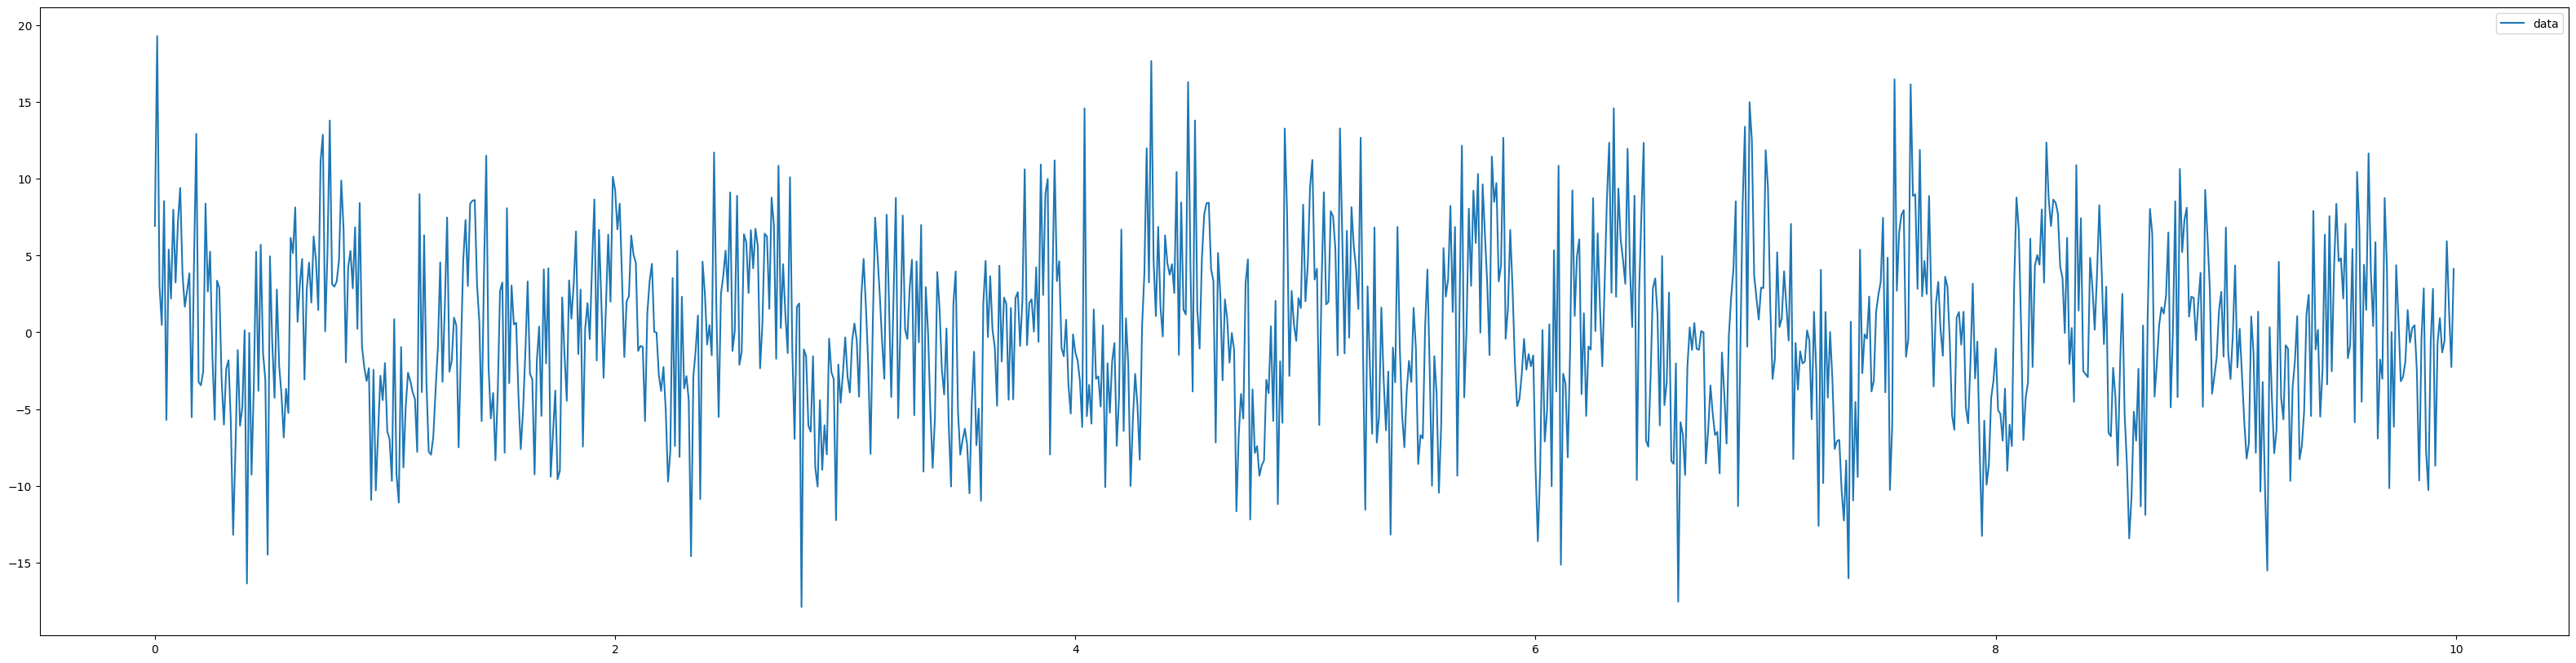

In [72]:
t = np.arange(0,10,0.01)

true_A = 5
true_w = 10
true_phi = np.pi/4
std = 5

sig = signal_fn(t,true_A,true_w,true_phi)
noise = noise_fn(std,len(t))
data = sig + noise

plt.figure(figsize=(40, 10))
#plt.plot(t,sig,label='signal')
plt.plot(t,data,label='data')
#plt.scatter(t,noise,label='noise')
plt.legend(loc='best')

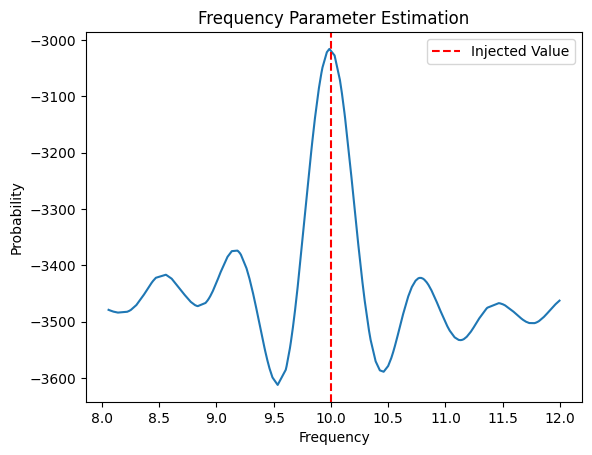

In [73]:
def ln_likelihood_w(t,true_A,w,true_phi,std,data):
  signal_data = signal_fn(t,true_A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,200)


w_and_likes = []

for i in w_iter:
  w_and_likes.append([i,ln_likelihood_w(t,true_A,i,true_phi,std,data)])

#Just for plotting
sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_w_and_likes]
y=[x[1] for x in sorted_w_and_likes]
plt.plot(x,y)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.axvline(x=10,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Frequency Parameter Estimation')

sorted_w_and_likes = sorted(w_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [74]:
N_iter = 10000
i=0

w_Nsample=[]

while(i<N_iter):
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_w(t,true_A,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_w_and_likes[0][1]:
    w_Nsample.append(sorted_w_and_likes.pop(0))
    sorted_w_and_likes.append([w_sample[0],ln_likes_sample])
    sorted_w_and_likes = sorted(sorted_w_and_likes,key=lambda x: x[1])

  i+=1

w_Nsample = sorted(w_Nsample,key=lambda x: x[1])
#w_Nsample
#x=[x[0] for x in w_Nsample]
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

w_Nsample[-1]

[10.032652002212016, -3028.3497976440726]

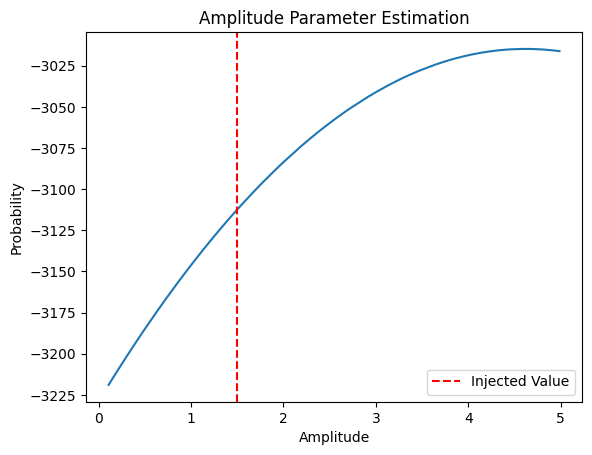

In [75]:
def ln_likelihood_A(t,A,true_w,true_phi,std,data):
  signal_data = signal_fn(t,A,true_w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [0.1,5]
A_iter = get_prior_A(A_range,200)


A_and_likes = []

for i in A_iter:
  A_and_likes.append([i,ln_likelihood_A(t,i,true_w,true_phi,std,data)])

sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[0])
x=[x[0] for x in sorted_A_and_likes]
y=[x[1] for x in sorted_A_and_likes]
plt.plot(x,y)
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.axvline(x=1.5,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Amplitude Parameter Estimation')


sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

In [76]:
N_iter = 10000
i=0

A_Nsample=[]

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,true_w,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_likes[0][1]:
    A_Nsample.append(sorted_A_and_likes.pop(0))
    sorted_A_and_likes.append([A_sample[0],ln_likes_sample])
    sorted_A_and_likes = sorted(sorted_A_and_likes,key=lambda x: x[1])

  i+=1

A_Nsample = sorted(A_Nsample,key=lambda x: x[1])
#w_Nsample
A_Nsample[-1]
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)
# y=[x[1] for x in w_Nsample]
# plt.plot(x,y)

[4.667174630761614, -3014.8687998035657]

In [77]:
def ln_likelihood_A_and_w(t,A,w,true_phi,std,data):
  signal_data = signal_fn(t,A,w,true_phi)
  ln_likes = -0.5 * ((data - signal_data)**2 / std**2 + np.log(2*np.pi*std**2))
  return sum(ln_likes)


def get_prior_A(A_range,n):
  return np.random.uniform(A_range[0],A_range[1],n)

A_range = [0,10]
A_iter = get_prior_A(A_range,100)

def get_prior_w(w_range,n):
  return np.random.uniform(w_range[0],w_range[1],n)

w_range = [8,12]
w_iter = get_prior_w(w_range,100)

A_and_w_likes = []

for i in range(len(A_iter)):
  A_and_w_likes.append([A_iter[i],w_iter[i],ln_likelihood_A(t,A_iter[i],w_iter[i],true_phi,std,data)])

sorted_A_and_w_likes = sorted(A_and_w_likes,key=lambda x: x[2])
sorted_A_and_w_likes

# x=[x[0] for x in sorted_A_and_w_likes]
# y=[x[1] for x in sorted_A_and_w_likes]
# plt.plot(x,y)
# plt.xlabel('Amplitude')
# plt.ylabel('Probability')
# plt.axvline(x=1.5,color='red',label='Injected Value', linestyle='dashed')
# plt.legend(loc='best')
# plt.title('Amplitude Parameter Estimation')
#sorted_A_and_likes = sorted(A_and_likes,key=lambda x: x[1])
#sorted_w_and_likes

[[9.735524385661137, 9.439844129740564, -4343.676324984111],
 [9.958149749321887, 11.070281827202411, -4315.863814157087],
 [9.600050002268985, 10.608264241474105, -4200.847972959286],
 [9.826710895694408, 8.824917088220724, -4181.08742722738],
 [9.511293425222616, 11.004296965429727, -4179.996298622303],
 [9.576971626743253, 11.914041103018173, -4147.7195339813225],
 [9.170029105615704, 10.329156420263665, -4131.502840711543],
 [9.609519466946956, 8.92190129736557, -4125.578307169977],
 [9.721842711412814, 9.310267116091353, -4106.000105403315],
 [9.714532038749283, 8.52193603487252, -4051.4355700803076],
 [9.502254039277856, 10.276535222841279, -4047.3140709913337],
 [7.768355233639386, 9.540614415804649, -4041.743933663626],
 [8.751944881426791, 8.003755817087844, -3989.7618957576315],
 [7.746011594062515, 10.385653238242778, -3966.2374800093453],
 [8.170125172299494, 9.661121810228428, -3965.576735378685],
 [8.340305615145759, 11.299364175955802, -3947.935412799177],
 [9.1425982119

In [78]:
N_iter = 400000
i=0

A_and_w_Nsample=[]

while(i<N_iter):
  A_sample = get_prior_A(A_range,1)
  w_sample = get_prior_w(w_range,1)
  ln_likes_sample = ln_likelihood_A(t,A_sample,w_sample,true_phi,std,data)

  if ln_likes_sample > sorted_A_and_w_likes[0][2]:
    A_and_w_Nsample.append(sorted_A_and_w_likes.pop(0))
    sorted_A_and_w_likes.append([A_sample[0],w_sample[0],ln_likes_sample])
    sorted_A_and_w_likes = sorted(sorted_A_and_w_likes,key=lambda x: x[2])

  i+=1

A_and_w_Nsample = sorted(A_and_w_Nsample,key=lambda x: x[2])
#w_Nsample
A_and_w_Nsample
#x = list(np.around(np.array(x),3))
#plt.hist(x,bins=100)



[[9.735524385661137, 9.439844129740564, -4343.676324984111],
 [9.958149749321887, 11.070281827202411, -4315.863814157087],
 [9.600050002268985, 10.608264241474105, -4200.847972959286],
 [9.826710895694408, 8.824917088220724, -4181.08742722738],
 [9.511293425222616, 11.004296965429727, -4179.996298622303],
 [9.576971626743253, 11.914041103018173, -4147.7195339813225],
 [9.170029105615704, 10.329156420263665, -4131.502840711543],
 [9.609519466946956, 8.92190129736557, -4125.578307169977],
 [9.721842711412814, 9.310267116091353, -4106.000105403315],
 [9.181376314622778, 8.208718179050404, -4080.647096757104],
 [9.714532038749283, 8.52193603487252, -4051.4355700803076],
 [9.502254039277856, 10.276535222841279, -4047.3140709913337],
 [7.768355233639386, 9.540614415804649, -4041.743933663626],
 [8.751944881426791, 8.003755817087844, -3989.7618957576315],
 [7.746011594062515, 10.385653238242778, -3966.2374800093453],
 [8.170125172299494, 9.661121810228428, -3965.576735378685],
 [8.34030561514

Text(0.5, 1.0, 'Amplitude Parameter Estimation')

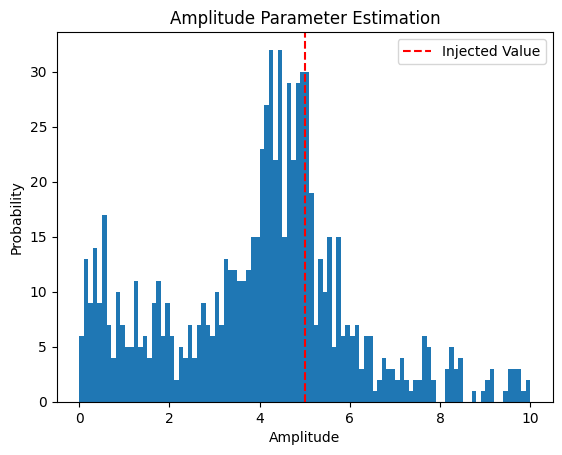

In [79]:
y=[x[0] for x in A_and_w_Nsample]
plt.hist(y,bins=100)
plt.xlabel('Amplitude')
plt.ylabel('Probability')
plt.axvline(x=5,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Amplitude Parameter Estimation')

Text(0.5, 1.0, 'Frequency Parameter Estimation')

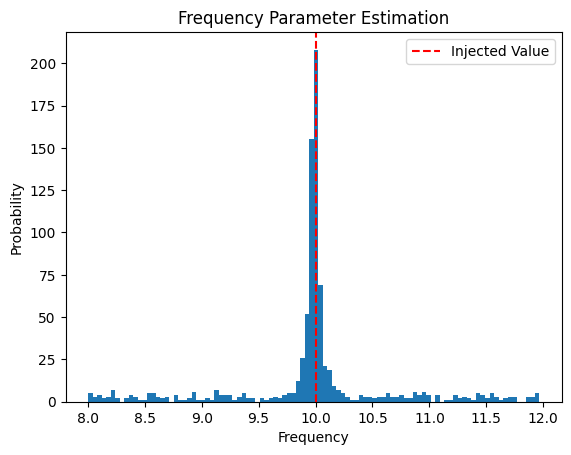

In [80]:
y=[x[1] for x in A_and_w_Nsample]
plt.hist(y,bins=100)
plt.xlabel('Frequency')
plt.ylabel('Probability')
plt.axvline(x=10,color='red',label='Injected Value', linestyle='dashed')
plt.legend(loc='best')
plt.title('Frequency Parameter Estimation')